In [2]:
import pandas as pd
df = pd.read_csv("train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print("Dimension of dataset is {}".format(df.shape))

Dimension of dataset is (891, 12)


PassengerID— A column added by Kaggle to identify each row and make sublessons easier

Survived— Whether the passenger survived or not and the value we are predicting (0=No, 1=Yes)

Pclass— The class of the ticket the passenger purchased (1=1st, 2=2nd, 3=3rd)

Sex— The passenger’s sex

Age— The passenger’s age in years

SibSp— The number of siblings or spouses the passenger had aboard the Titanic

Parch— The number of parents or children the passenger had aboard the Titanic

Ticket— The passenger’s ticket number

Fare— The fare the passenger paid

Cabin— The passenger’s cabin number

Embarked— The port where the passenger embarked (C=Cherbourg, Q=Queenstown, S=Southampton)

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
import matplotlib.pyplot as plt

        Survived
Sex             
female  0.742038
male    0.188908


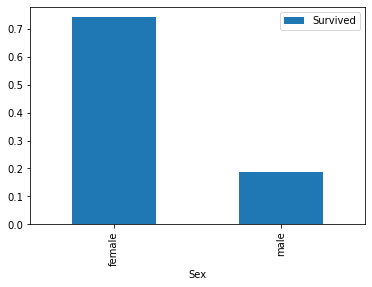

In [9]:
sex_pivot = df.pivot_table(index="Sex",values="Survived")
print(sex_pivot)
sex_pivot.plot.bar()
plt.show()

females survived in much higher proportions than males did. Let’s do the same with the Pclass column.

        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


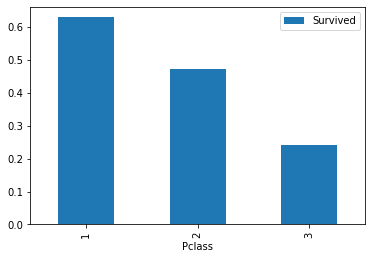

In [11]:
pClass_pivot = df.pivot_table(index="Pclass",values="Survived")
print(pClass_pivot)
pClass_pivot.plot.bar()
plt.show()

### Exploring and converting the age column

The Sex and PClass columns are what we call categorical features. That means that the values represented a few separate options (for instance, whether the passenger was male or female).

Let’s take a look at the Age column using Series.describe().

In [12]:
df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

The Age column contains numbers ranging from 0.42 to 80.0 (If you look at Kaggle’s data page, it informs us that Age is fractional if the passenger is less than one). 

The other thing to note here is that there are 714 values in this column, fewer than the 814 rows we discovered that the train data set had earlier in this lesson which indicates we have some missing values.

All of this means that the Age column needs to be treated slightly differently, as this is a continuous numerical column. One way to look at distribution of values in a continuous numerical set is to use histograms. We can create two histograms to compare visually the those that survived vs those who died across different age ranges:

In [13]:
survived = df[df['Survived']==1]
survived

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
...,...,...,...,...,...,...,...,...,...,...,...,...
875,876,1,3,"Najib, Miss. Adele Kiamie ""Jane""",female,15.0,0,0,2667,7.2250,NaN,C
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


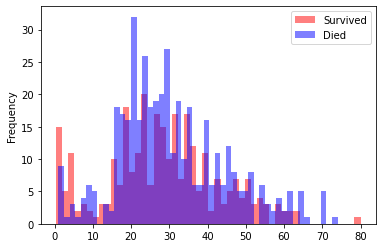

In [14]:
died = df[df["Survived"] == 0]
survived["Age"].plot.hist(alpha=0.5,color='red',bins=50)
died["Age"].plot.hist(alpha=0.5,color='blue',bins=50)
plt.legend(['Survived','Died'])
plt.show()

The relationship here is not simple, but we can see that in some age ranges more passengers survived – where the red bars are higher than the blue bars.

In order for this to be useful to our machine learning model, we can separate this continuous feature into a categorical feature by dividing it into ranges. We can use the pandas.cut() function to help us out.

The pandas.cut() function has two required parameters – the column we wish to cut, and a list of numbers which define the boundaries of our cuts. We are also going to use the optional parameter labels, which takes a list of labels for the resultant bins. This will make it easier for us to understand our results.

Before we modify this column, we have to be aware of two things. Firstly, any change we make to the train data, we need to remember to handle the missing values we observed above.

We’ll create a function that:

Uses the pandas.fillna() method to fill all of the missing values with -0.5

Cuts the Age column into six segments:

Missing, from -1 to 0

Infant, from 0 to 5

Child, from 5 to 12

Teenager, from 12 to 18

Young Adult, from 18 to 35

Adult, from 35 to 60

Senior, from 60 to 100

In [16]:
def process_age(df1,cut_points,label_names):
    df1["Age"] = df1["Age"].fillna(-0.5)
    df1["Age_categories"] = pd.cut(df1["Age"],cut_points,labels=label_names)
    return df1

cut_points = [-1,0,5,12,18,35,60,100]
label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
df = process_age(df,cut_points,label_names)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categories
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Young Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Young Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Young Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Young Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Young Adult
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Young Adult
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,W./C. 6607,23.4500,NaN,S,Missing
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Young Adult


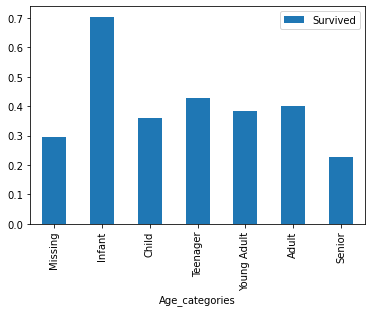

In [17]:


pivot = df.pivot_table(index="Age_categories",values='Survived')
pivot.plot.bar()
plt.show()

### Preparing our data for machine learning

So far we have identified three columns that may be useful for predicting survival:

Sex

Pclass

Age, or more specifically our newly created Age_categories

Before we build our model, we need to prepare these columns for machine learning. Most machine learning algorithms can’t understand text labels, so we have to convert our values into numbers.

Additionally, we need to be careful that we don’t imply any numeric relationship where there isn’t one. The data dictionary tells us that the values in the Pclass columnare 1, 2, and 3. We can confirm this with pandas:

In [ ]:
df["Pclass"].value_counts()


While the class of each passenger certainly has some sort of ordered relationship, the relationship between each class is not the same as the relationship between the numbers 1, 2, and 3. For instance, class 2 isn’t “worth” double what class 1 is, and class 3 isn’t “worth” triple what class 1 is.

In order to remove this relationship, we can create dummy columns for each unique value in Pclass:

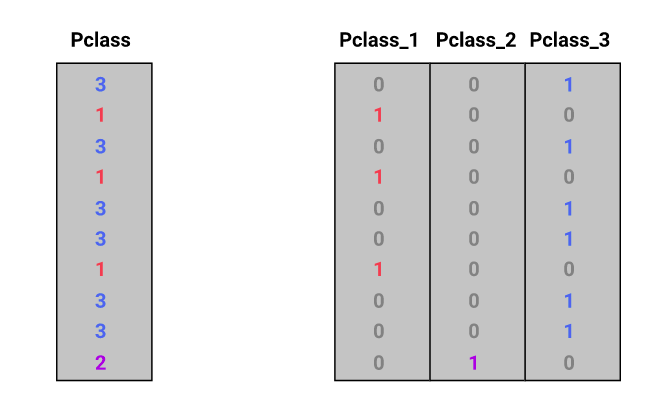

Rather than doing this manually, we can use the pandas.get_dummies() function which will generate columns shown in the diagram above.

We’ll create a function to create the dummy columns for the Pclass column and add it back to the original dataframe. We’ll then apply that function on the train and test dataframes for each of the Pclass, Sex, and Age_categories columns.

In [18]:
def create_dummies(df1,column_name):
    dummies = pd.get_dummies(df1[column_name],prefix=column_name)
    df1 = pd.concat([df1,dummies],axis=1)
    return df1

for column in ["Pclass","Sex","Age_categories"]:
    df = create_dummies(df,column)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,1,0,1,0,0,0,0,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0,1,0,0,0,0,0,0,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,...,1,1,0,0,0,0,0,1,0,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,...,0,1,0,0,0,0,0,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,...,0,0,1,0,0,0,0,1,0,0
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,...,0,1,0,0,0,0,0,1,0,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,-0.5,1,2,W./C. 6607,23.4500,...,1,1,0,1,0,0,0,0,0,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,...,0,0,1,0,0,0,0,1,0,0


### Creating our first machine learning model

Now that our data has been prepared, we are ready to train our first model. The first model 

we will use is called Logistic Regression, which is often the first model you will train when performing classification.

We will be using the scikit-learn library as it has many tools that make performing machine learning easier. The scikit-learn workflow consists of four main steps:

Instantiate (or create) the specific machine learning model you want to use

Fit the model to the training data

Use the model to make predictions

Evaluate the accuracy of the predictions

Each model in scikit-learn is implemented as a separate class and the first step is to identify the class we want to create an instance of. In our case, we want to use the LogisticRegression class.

In [19]:
from sklearn.model_selection import train_test_split
#Split arrays or matrices into random train and test subsets

In [20]:
#split input and output data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   PassengerId                 891 non-null    int64   
 1   Survived                    891 non-null    int64   
 2   Pclass                      891 non-null    int64   
 3   Name                        891 non-null    object  
 4   Sex                         891 non-null    object  
 5   Age                         891 non-null    float64 
 6   SibSp                       891 non-null    int64   
 7   Parch                       891 non-null    int64   
 8   Ticket                      891 non-null    object  
 9   Fare                        891 non-null    float64 
 10  Cabin                       204 non-null    object  
 11  Embarked                    889 non-null    object  
 12  Age_categories              891 non-null    category
 13  Pclass_1            

In [22]:

y = df['Survived']
#X = df.drop('Survived', 1)
X = df[['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
      'Age_categories_Senior']]

In [24]:
X.head()


,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
0,0,0,1,0,1,0,0,0,0,1,0,0
1,1,0,0,1,0,0,0,0,0,0,1,0
2,0,0,1,1,0,0,0,0,0,1,0,0
3,1,0,0,1,0,0,0,0,0,1,0,0
4,0,0,1,0,1,0,0,0,0,1,0,0


In [25]:
y.describe()

count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [27]:
X_train.shape

(712, 12)

In [28]:
X_test.shape

(179, 12)

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
lr = LogisticRegression()
column = ['Pclass_1', 'Pclass_2', 'Pclass_3', 'Sex_female', 'Sex_male',
       'Age_categories_Missing','Age_categories_Infant',
       'Age_categories_Child', 'Age_categories_Teenager',
       'Age_categories_Young Adult', 'Age_categories_Adult',
      'Age_categories_Senior']

we use the LogisticRegression.fit() method to train our model. The .fit() method accepts two arguments: X and y. X must be a two dimensional array (like a dataframe) of the features that we wish to train our model on, and y must be a one-dimensional array (like a series) of our target, or the column we wish to predict.

In [44]:
lr.fit(X_train,y_train)

LogisticRegression()

In [45]:
ypred = lr.predict(X_test)
ypred

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1])

In [48]:
X_test

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_categories_Missing,Age_categories_Infant,Age_categories_Child,Age_categories_Teenager,Age_categories_Young Adult,Age_categories_Adult,Age_categories_Senior
205,0,0,1,1,0,0,1,0,0,0,0,0
44,0,0,1,1,0,0,0,0,0,1,0,0
821,0,0,1,0,1,0,0,0,0,1,0,0
458,0,1,0,1,0,0,0,0,0,0,1,0
795,0,1,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
247,0,1,0,1,0,0,0,0,0,1,0,0
259,0,1,0,1,0,0,0,0,0,0,1,0
353,0,0,1,0,1,0,0,0,0,1,0,0
783,0,0,1,0,1,1,0,0,0,0,0,0


In [54]:
lr.predict_proba(X_test)

array([[0.11965912, 0.88034088],
       [0.41623115, 0.58376885],
       [0.90565336, 0.09434664],
       [0.26422395, 0.73577605],
       [0.82861122, 0.17138878],
       [0.53049301, 0.46950699],
       [0.91429634, 0.08570366],
       [0.53836071, 0.46163929],
       [0.07742766, 0.92257234],
       [0.47931653, 0.52068347],
       [0.08531391, 0.91468609],
       [0.90565336, 0.09434664],
       [0.74721378, 0.25278622],
       [0.53836071, 0.46163929],
       [0.469465  , 0.530535  ],
       [0.90565336, 0.09434664],
       [0.07742766, 0.92257234],
       [0.648883  , 0.351117  ],
       [0.36040873, 0.63959127],
       [0.90565336, 0.09434664],
       [0.92533636, 0.07466364],
       [0.1207006 , 0.8792994 ],
       [0.90565336, 0.09434664],
       [0.41623115, 0.58376885],
       [0.90565336, 0.09434664],
       [0.92533636, 0.07466364],
       [0.18003091, 0.81996909],
       [0.75060194, 0.24939806],
       [0.90565336, 0.09434664],
       [0.90565336, 0.09434664],
       [0.

In [ ]:
type(X_test)

In [49]:
lr.score(X_test,y_test)

0.8044692737430168

In [50]:
from sklearn.metrics import *

In [53]:
recall_score(y_test,ypred)

0.7066666666666667